In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [10]:
stock_data=pd.read_csv(r"C:\Users\Computer Hospital\Downloads\Stock_Market_Data.csv")

In [11]:
stock_data['Date']=pd.to_datetime(stock_data['Date'],dayfirst=True)
stock_data.dtypes

Date      datetime64[ns]
Name              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [12]:
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [13]:
# Calculate basic summary statistics for 'Date' column (mean, median, standard deviation, etc.)
stock_data['Date'].describe()


count                            49158
mean     2022-03-31 12:56:37.436836608
min                2022-01-02 00:00:00
25%                2022-02-13 00:00:00
50%                2022-03-30 00:00:00
75%                2022-05-19 00:00:00
max                2022-06-30 00:00:00
Name: Date, dtype: object

In [14]:
# Calculate basic summary statistics for 'Name' column (mean, median, standard deviation, etc.)
stock_data['Name'].describe()

count       49158
unique        412
top       01.Bank
freq          122
Name: Name, dtype: object

In [15]:
# Calculate basic summary statistics for 'Open' column (mean, median, standard deviation, etc.)
stock_data['Open'].describe()

count    49158.000000
mean       157.869018
std        520.191624
min          3.900000
25%         19.000000
50%         40.300000
75%         89.400000
max       6000.000000
Name: Open, dtype: float64

In [16]:
# Calculate basic summary statistics for 'High' column (mean, median, standard deviation, etc.)
stock_data['High'].describe()

count    49158.000000
mean       159.588214
std        523.348078
min          3.900000
25%         19.300000
50%         41.000000
75%         90.500000
max       6050.000000
Name: High, dtype: float64

In [17]:
# Calculate basic summary statistics for 'Low' column (mean, median, standard deviation, etc.)
stock_data['Low'].describe()

count    49158.000000
mean       155.906364
std        517.136149
min          3.000000
25%         18.700000
50%         39.535000
75%         87.700000
max       5975.000000
Name: Low, dtype: float64

In [18]:
# Calculate basic summary statistics for 'Close' column (mean, median, standard deviation, etc.)
stock_data['Close'].describe()

count    49158.000000
mean       157.351462
std        519.711667
min          3.800000
25%         19.000000
50%         40.100000
75%         88.700000
max       6000.500000
Name: Close, dtype: float64

In [19]:
# Calculate basic summary statistics for 'Volume' column (mean, median, standard deviation, etc.)
stock_data['Volume'].describe()

count    4.915800e+04
mean     5.619999e+05
std      1.276909e+06
min      1.000000e+00
25%      5.109475e+04
50%      1.824160e+05
75%      5.401398e+05
max      6.593180e+07
Name: Volume, dtype: float64

<Axes: ylabel='Frequency'>

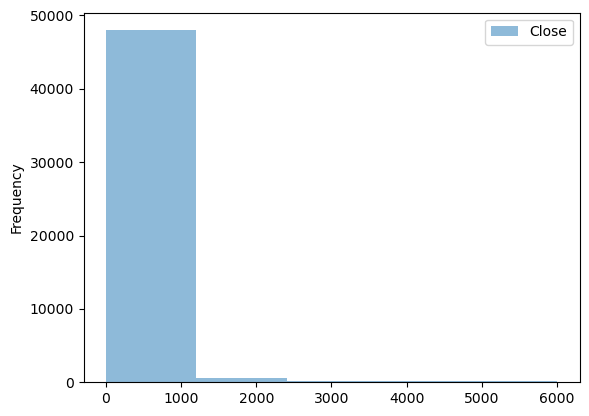

In [20]:
# Explore the distribution of the 'Close' prices over time

df = stock_data[['Date', 'Close']].copy()     # creating a new dataframe with 'Date' and 'Close' columns
df.plot.hist(bins=5,alpha=.5)                 # distribution of 'Close'

In [21]:
# Identify and analyze any outliers (if any) in the dataset.

mean = np.mean(stock_data['Volume'])
std = np.std(stock_data['Volume'])
 
threshold = 3
outliers = []
for x in stock_data['Close']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  561999.9319742463

Standard deviation:  1276895.7129934474

Outliers  :  []


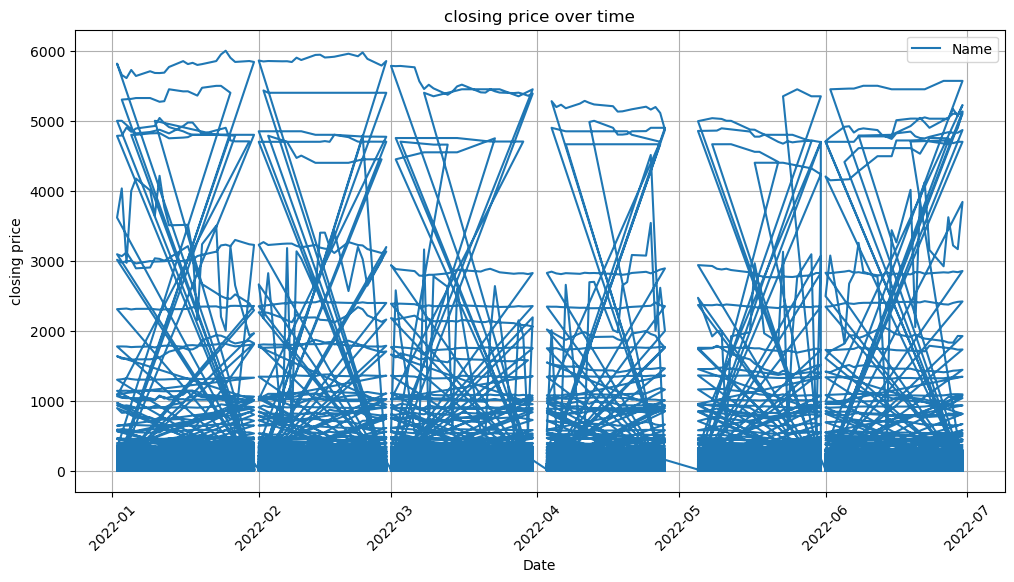

In [10]:
# Create a line chart to visualize the 'Close' prices over time.

plt.figure(figsize=(12,6))

plt.plot(stock_data['Date'],stock_data['Close'],label='Name')

plt.xlabel('Date')
plt.ylabel('closing price')
plt.title('closing price over time')
plt.legend()
plt.grid()

# improving readability

plt.xticks(rotation=45)
plt.show()

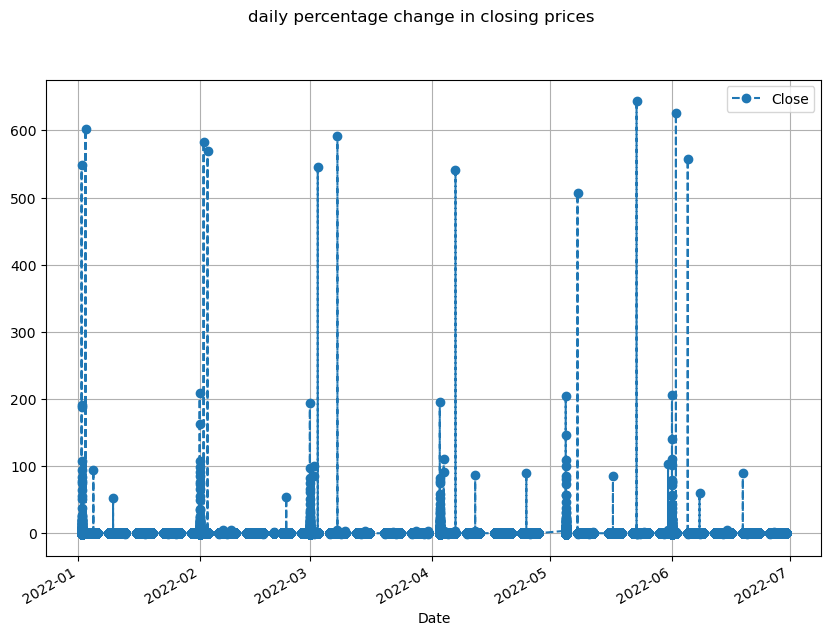

In [22]:
# Calculate and plot the daily percentage change in closing prices

df1 = df.set_index('Date')
daily_changes = df1.pct_change(periods=1)   # The daily percentage change in closing prices.

daily_changes['Close'].plot(figsize=(10,7),legend=True,linestyle='--',marker='o')  # plot the daily percentage change in closing prices
plt.suptitle('daily percentage change in closing prices', fontsize=12, color='black')
plt.grid(True)
plt.show() 

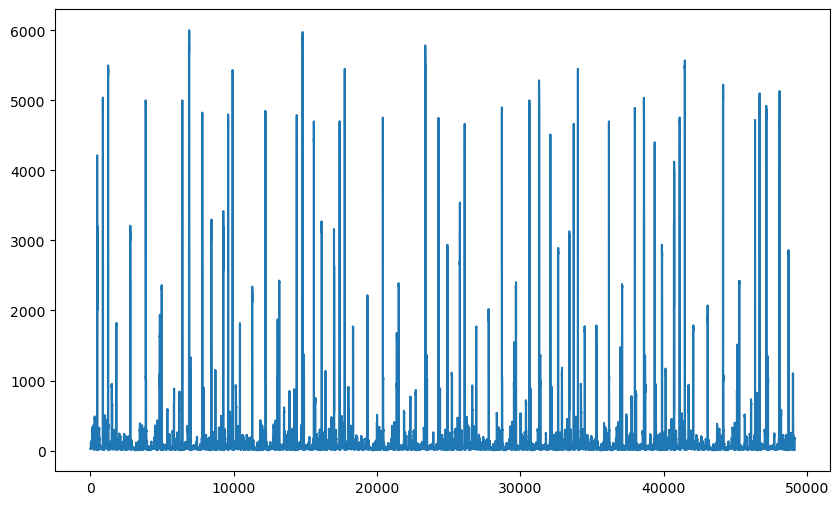

In [20]:
# General overview of 'Close'
df.reset_index(inplace=True)
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(df['Close'])

Text(0.5, 0.98, '\nMultiplicative Decompose')

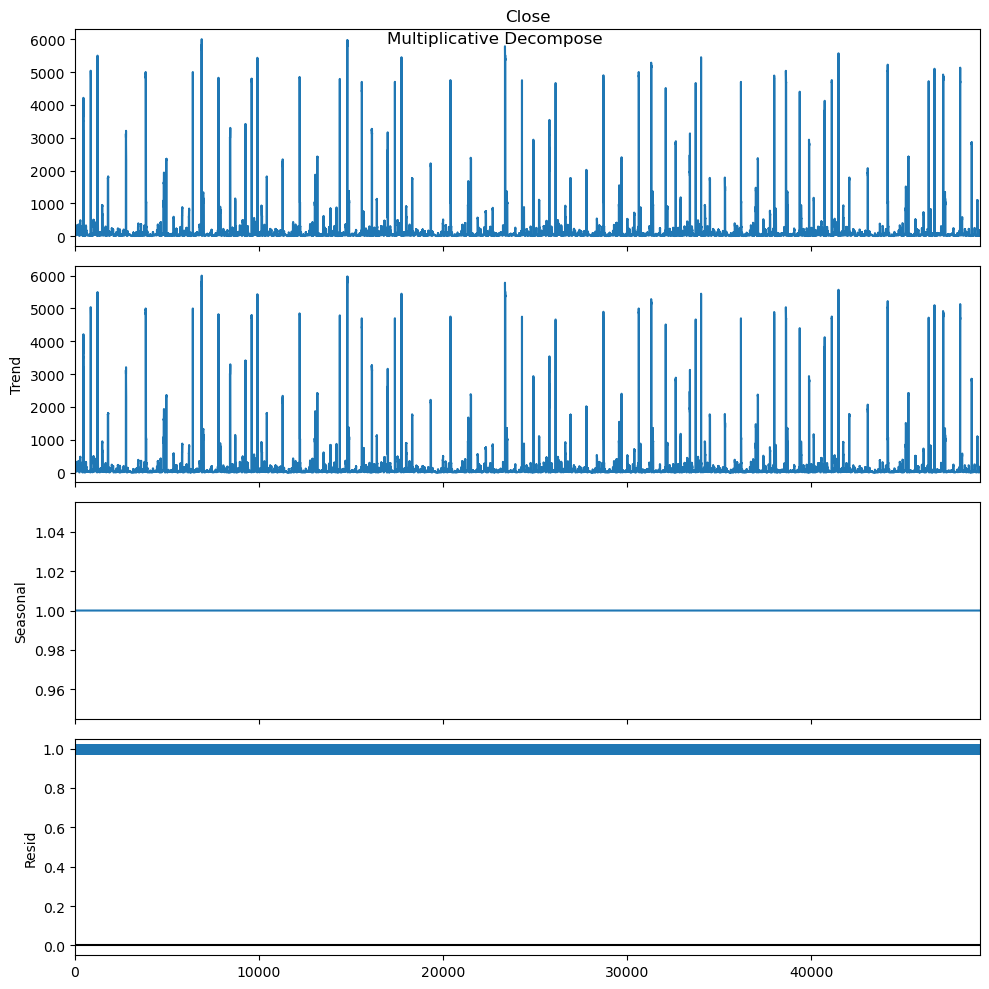

In [23]:
# Investigate the presence of any trends or seasonality in the stock prices

# multiplicative decomposition
mul_result = seasonal_decompose(df['Close'], model='multiplicative',period=1)

# additive decomposition
add_result = seasonal_decompose(df['Close'], model='additive',period=1)

# plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

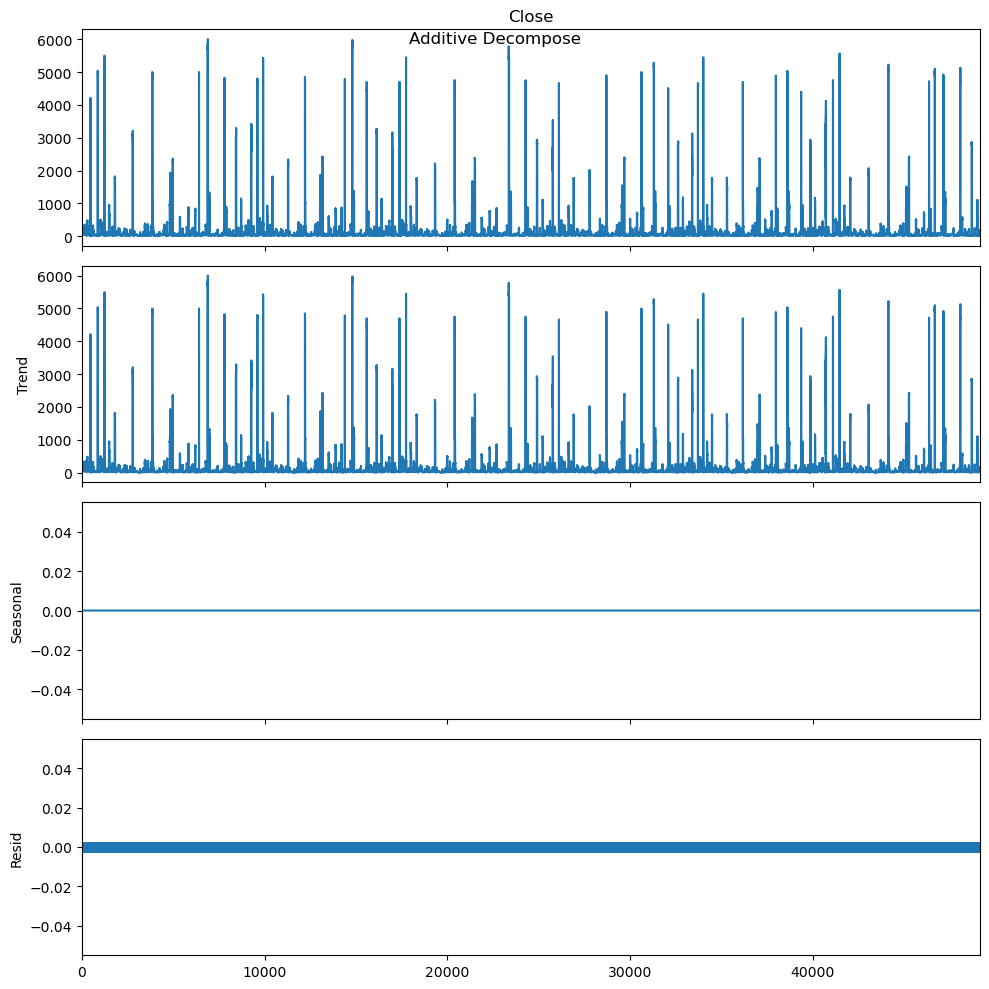

In [24]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

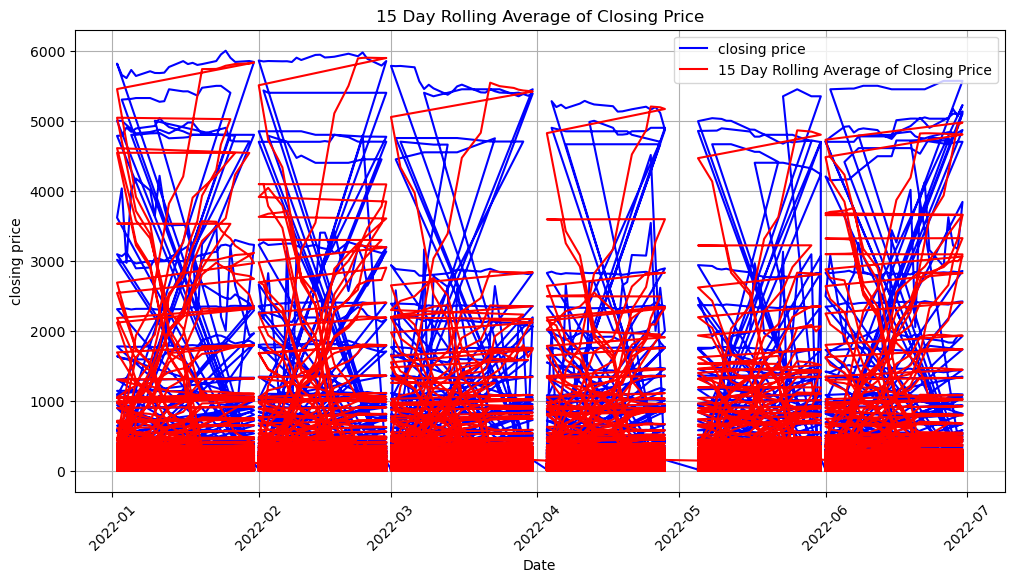

In [24]:
#Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph

df['15_day_rolling_avg']=df['Close'].rolling(window=15).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'],label='closing price',color='blue')
plt.plot(df['Date'],df['15_day_rolling_avg'],label='15 Day Rolling Average of Closing Price',color='red')

plt.xlabel('Date')
plt.ylabel('closing price')
plt.title('15 Day Rolling Average of Closing Price')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [25]:
# Calculate the average closing price for each stock

grouped_df=stock_data.groupby('Name')
average_closing_price = grouped_df['Close'].mean()
print(average_closing_price)

Name
01.Bank                       21.260902
02.Cement                     96.600820
03.Ceramics_Sector            71.225164
04.Engineering               132.352459
05.Financial_Institutions     29.253525
                                ...    
WMSHIPYARD                    12.370492
YPL                           21.339344
ZAHEENSPIN                     9.964754
ZAHINTEX                       7.858197
ZEALBANGLA                   150.338525
Name: Close, Length: 412, dtype: float64


In [26]:
# Identify the top 5 and bottom 5 stocks based on average closing price

top_5_stocks = average_closing_price.sort_values(ascending=False).head(5)
bottom_5_stocks = average_closing_price.sort_values().head(5)

print("Top 5 stocks based on average closing price:")
print(top_5_stocks)

print("\nBottom 5 stocks based on average closing price:")
print(bottom_5_stocks)

Top 5 stocks based on average closing price:
Name
APSCLBOND     5413.238636
RECKITTBEN    5342.024793
PREBPBOND     4918.357143
IBBL2PBOND    4851.330357
PBLPBOND      4836.195652
Name: Close, dtype: float64

Bottom 5 stocks based on average closing price:
Name
FAMILYTEX     4.698361
ICBIBANK      4.725620
FBFIF         5.289344
POPULAR1MF    5.368033
PHPMF1        5.417213
Name: Close, dtype: float64


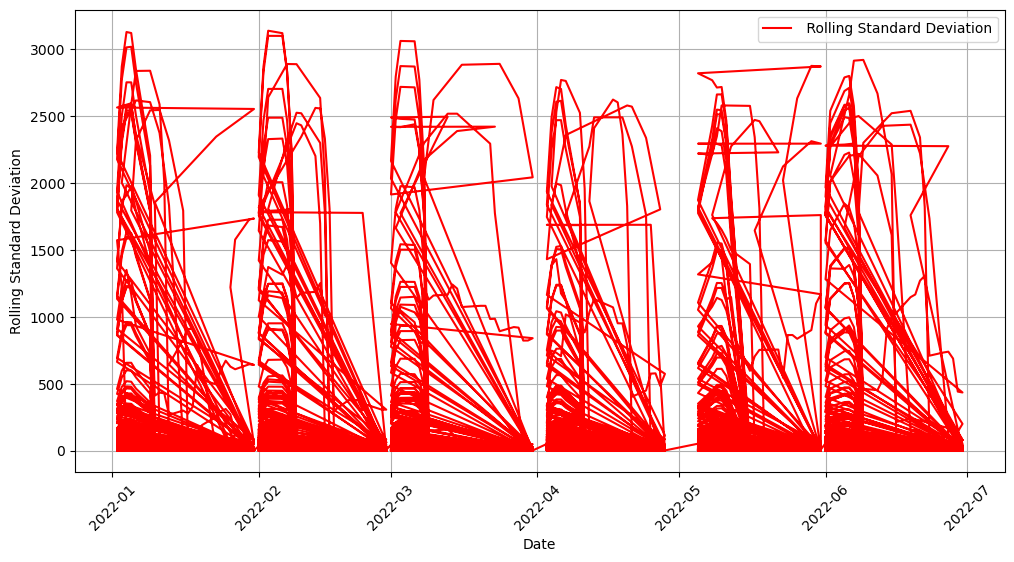

In [29]:
# Calculate and plot the rolling standard deviation of the 'Close' prices.

df['7d_std'] = df['Close'].rolling(window=7).std()  # Calculate the rolling standard deviation of the 'Close' prices.

# Plot the rolling standard deviation
plt.figure(figsize=(12,6))

plt.plot(df['Date'],df['7d_std'],label=' Rolling Standard Deviation',color='red')

plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')

plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [31]:
# Create a new column for daily price change (Close - Open).

stock_data['Daily Price Change'] = stock_data['Close'] - stock_data['Open']
print(stock_data.head())

        Date     Name   Open   High    Low  Close      Volume  \
0 2022-01-02  01.Bank  22.83  23.20  22.59  22.93  1842350.41   
1 2022-01-03  01.Bank  23.03  23.29  22.74  22.90  1664989.63   
2 2022-01-04  01.Bank  22.85  23.13  22.64  22.84  1354510.97   
3 2022-01-05  01.Bank  22.91  23.20  22.70  22.98  1564334.81   
4 2022-01-06  01.Bank  23.12  23.65  23.00  23.37  2586344.19   

   Daily Price Change  
0                0.10  
1               -0.13  
2               -0.01  
3                0.07  
4                0.25  


<Axes: ylabel='Frequency'>

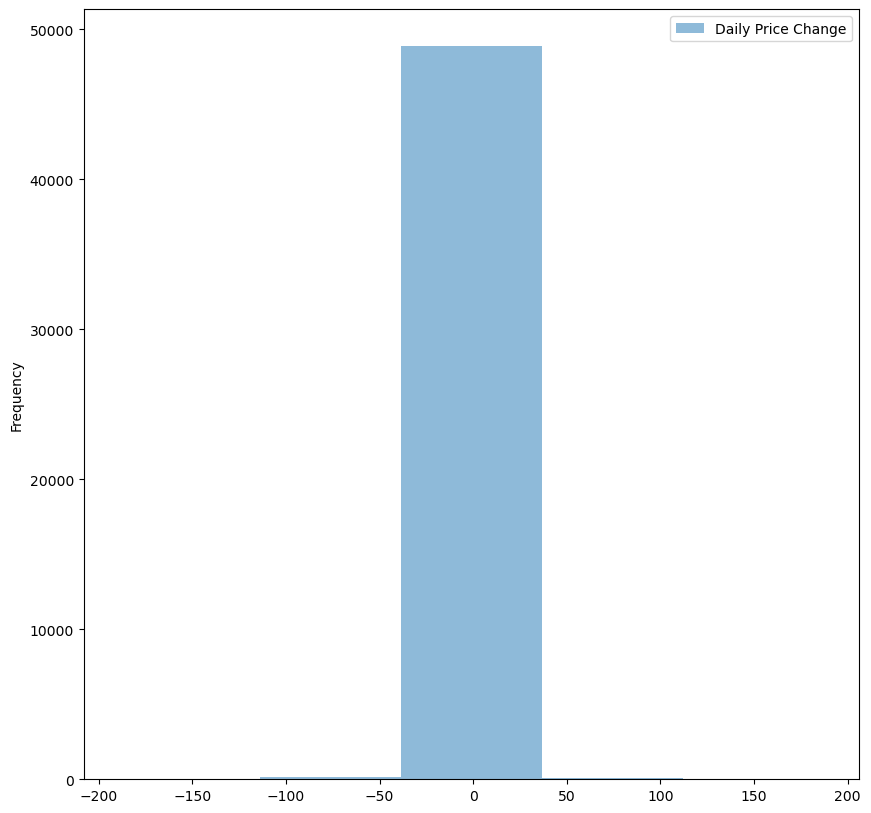

In [32]:
# Analyze the distribution of daily price changes.

Daily_Price_Change = stock_data[['Date', 'Daily Price Change']].copy()     # creating a new dataframe with 'Date' and 'Daily Price Change' columns
Daily_Price_Change.plot.hist(bins=5,alpha=.5)                 # distribution of 'Daily Price Change'

In [33]:
# Identify days with the largest price increases 

largest_increases = stock_data.sort_values(by='Daily Price Change', ascending=False)
print("Days with Largest Price Increases:")
print(largest_increases[['Date', 'Daily Price Change']].head())

Days with Largest Price Increases:
            Date  Daily Price Change
48081 2022-06-29               187.0
46684 2022-06-27               145.5
46681 2022-06-21               141.5
6878  2022-01-05               125.6
44145 2022-06-30               124.5


In [35]:
# Identify days with the largest price decreases

largest_decreases = stock_data.sort_values(by='Daily Price Change')
print("\nDays with Largest Price Decreases:")
print(largest_decreases[['Date', 'Daily Price Change']].head())


Days with Largest Price Decreases:
            Date  Daily Price Change
23365 2022-03-07              -189.2
2774  2022-01-03              -182.5
31312 2022-04-28              -178.7
2786  2022-01-20              -166.6
6896  2022-01-31              -154.9


In [34]:
# Identify the with the largest price increased

largest_increase_date = stock_data.loc[stock_data['Daily Price Change'].idxmax(), 'Date']
print(f"The date with the largest price increase is: {largest_increase_date}")

The date with the largest price increase is: 2022-06-29 00:00:00


In [36]:
# Identify the with the largest price decreased

largest_decrease_date = stock_data.loc[stock_data['Daily Price Change'].idxmin(), 'Date']
print(f"The date with the largest price decrease is: {largest_decrease_date}")


The date with the largest price decrease is: 2022-03-07 00:00:00


In [37]:
# Identify stocks with unusually high trading volume on certain days

stock_data['30-day Avg Volume'] = stock_data.groupby('Name')['Volume'].rolling(window=30).mean().reset_index(level=0, drop=True)

# Identify unusually high volume days
threshold = 2.0  
stock_data['Unusually High Volume'] = stock_data['Volume'] > threshold * stock_data['30-day Avg Volume']

# Display relevant columns
print(stock_data[['Date', 'Name', 'Volume', 'Unusually High Volume']])

            Date        Name      Volume  Unusually High Volume
0     2022-01-02     01.Bank  1842350.41                  False
1     2022-01-03     01.Bank  1664989.63                  False
2     2022-01-04     01.Bank  1354510.97                  False
3     2022-01-05     01.Bank  1564334.81                  False
4     2022-01-06     01.Bank  2586344.19                  False
...          ...         ...         ...                    ...
49153 2022-06-26  ZEALBANGLA    10480.00                  False
49154 2022-06-27  ZEALBANGLA    13817.00                  False
49155 2022-06-28  ZEALBANGLA     5214.00                  False
49156 2022-06-29  ZEALBANGLA     6678.00                  False
49157 2022-06-30  ZEALBANGLA     5883.00                  False

[49158 rows x 4 columns]


In [38]:
stock_data=pd.read_csv(r"C:\Users\Computer Hospital\Downloads\Stock_Market_Data.csv",parse_dates=['Date'], index_col='Date')

Annualized historical volatility for your asset: 150.3696


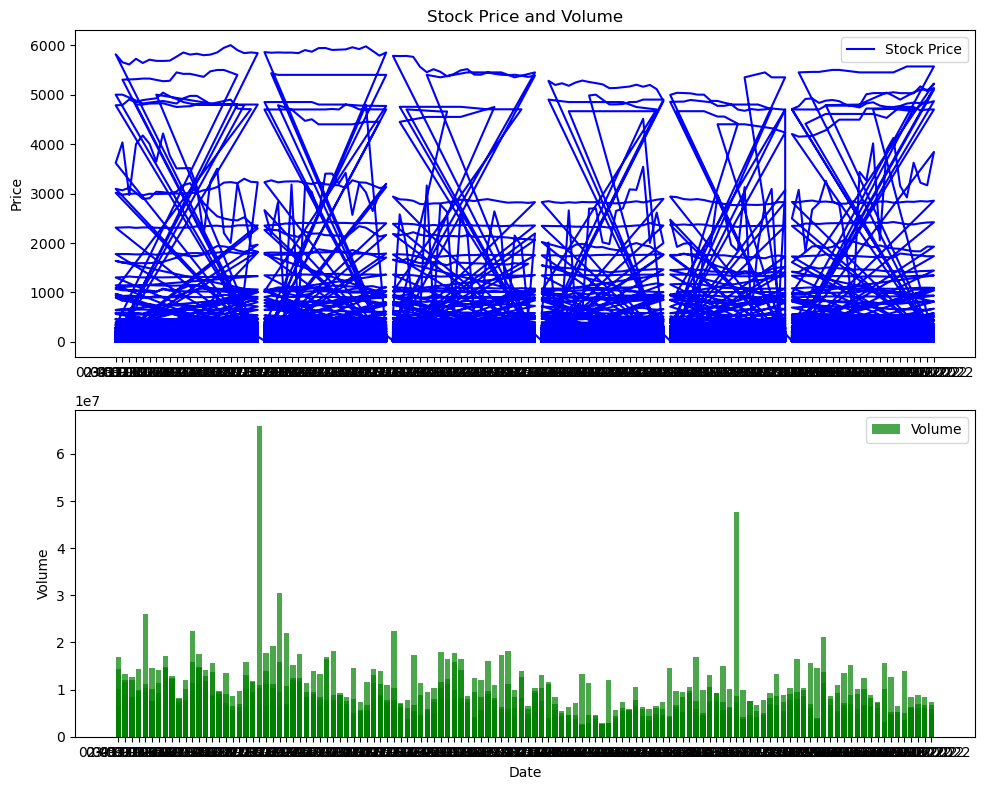

In [39]:
# Explore the relationship between trading volume and volatility in python


# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate annualized historical volatility
volatility = stock_data['Daily_Return'].std() * np.sqrt(252)  # Assuming 252 trading days in a year

print(f"Annualized historical volatility for your asset: {volatility:.4f}")

# Plot stock price and volume
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(stock_data.index, stock_data['Close'], label='Stock Price', color='b')
ax[0].set_ylabel('Price')
ax[0].set_title('Stock Price and Volume')
ax[0].legend()

ax[1].bar(stock_data.index, stock_data['Volume'], label='Volume', color='g', alpha=0.7)
ax[1].set_ylabel('Volume')
ax[1].set_xlabel('Date')
ax[1].legend()


plt.tight_layout()
plt.show()

In [47]:
# Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.

# Select relevant columns
price_columns = ['Open', 'High', 'Low', 'Close']
price_data = stock_data[price_columns]

# Calculate the correlation matrix
correlation_matrix = price_data.corr()

print(correlation_matrix)


           Open      High       Low     Close
Open   1.000000  0.999940  0.999939  0.999925
High   0.999940  1.000000  0.999887  0.999942
Low    0.999939  0.999887  1.000000  0.999961
Close  0.999925  0.999942  0.999961  1.000000


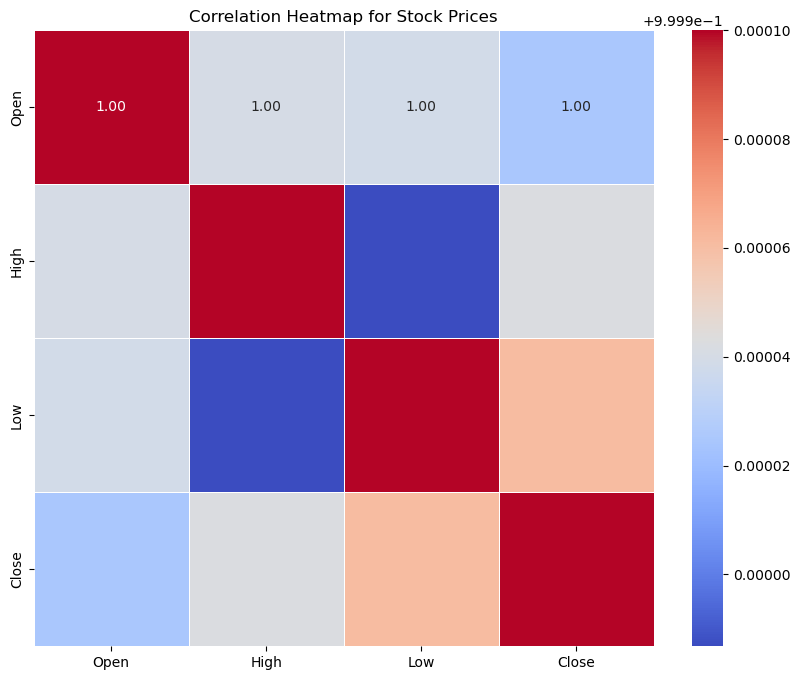

In [48]:
# Create a heatmap to visualize the correlations using the seaborn package.

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Stock Prices')
plt.show()